<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/DA1_C1_Mini_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA1-C1 • Guided Mini‑Exercises (Python)
Colab‑ready notebook with small, runnable tasks every few slides. Run cells top‑to‑bottom. Keep outputs for submission.

**How to use**
1) Runtime → Run all (or run cell‑by‑cell).
2) Replace TODOs.
3) Add brief answers under each "Reflect" prompt.

**Libraries used**: numpy, pandas, scipy, matplotlib.
_Note: We only use matplotlib for plots (no seaborn)._

## 0) Warm‑up & Environment Check (Slides: Tools & Hands‑on)

In [1]:
# Quick check: versions
import sys, numpy as np, pandas as pd
import matplotlib
import scipy

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("SciPy:", scipy.__version__)

Python: 3.12.11
NumPy: 2.0.2
pandas: 2.2.2
Matplotlib: 3.10.0
SciPy: 1.16.1


## 1) Descriptive Statistics (Slides 23–31)
**Task A:** Create a small DataFrame with two numeric columns (`age`, `income`).
- Compute mean, median, variance, standard deviation for each column.
- Compute the 25%, 50%, 75% quantiles.

**Task B:** Plot one histogram for `income` and one boxplot for `age`.
_Tip: Use matplotlib only, and create a separate figure for each plot._

**Reflect:** When would you prefer SD over variance for interpretation?

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# --- Task A ---
df = pd.DataFrame({
    "age": [25, 31, 29, 42, 37, 52, 46, 22, 28, 34],
    "income": [42000, 50000, 48000, 65000, 59000, 82000, 77000, 41000, 47000, 56000]
})

summary = df.describe()
means = df.mean(numeric_only=True)
medians = df.median(numeric_only=True)
variances = df.var(numeric_only=True, ddof=0)  # population variance to match slide formulas
stds = df.std(numeric_only=True, ddof=0)       # population SD

q = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
summary, means, medians, variances, stds, q

(             age        income
 count  10.000000     10.000000
 mean   34.600000  56700.000000
 std     9.617114  14158.232784
 min    22.000000  41000.000000
 25%    28.250000  47250.000000
 50%    32.500000  53000.000000
 75%    40.750000  63500.000000
 max    52.000000  82000.000000,
 age          34.6
 income    56700.0
 dtype: float64,
 age          32.5
 income    53000.0
 dtype: float64,
 age       8.324000e+01
 income    1.804100e+08
 dtype: float64,
 age           9.123596
 income    13431.678972
 dtype: float64,
         age   income
 0.25  28.25  47250.0
 0.50  32.50  53000.0
 0.75  40.75  63500.0)

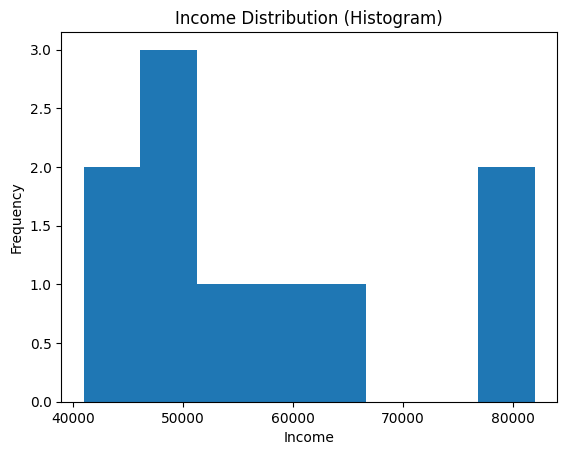

In [3]:
# --- Task B: Histogram (income) ---
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['income'], bins=8)
plt.title('Income Distribution (Histogram)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

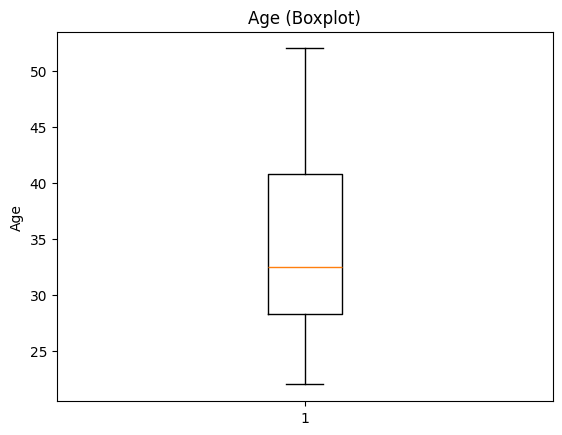

In [4]:
# --- Task B: Boxplot (age) ---
plt.figure()
plt.boxplot(df['age'])
plt.title('Age (Boxplot)')
plt.ylabel('Age')
plt.show()

> **Reflect:** Write two sentences here on SD vs variance.

## 2) Probability Basics via Simulation (Slides 39–44)
**Task:**
- Simulate 10,000 fair coin toss pairs. Estimate P(two heads).
- Simulate drawing without replacement from a bag (3 red, 2 blue) for two draws. Estimate P(both red).
- Compare your estimates to theoretical values.

In [5]:
import numpy as np

n = 10_000
# Two coin tosses
tosses = np.random.randint(0, 2, size=(n, 2))  # 0 or 1
two_heads = np.mean((tosses.sum(axis=1) == 2).astype(float))

# Bag without replacement: 3R, 2B
# We simulate by sampling indices without replacement
both_red = 0
for _ in range(n):
    bag = ['R','R','R','B','B']
    draw = np.random.choice(len(bag), size=2, replace=False)
    if bag[draw[0]] == 'R' and bag[draw[1]] == 'R':
        both_red += 1
both_red_prob = both_red / n

print("Estimated P(two heads):", two_heads, " | Theoretical = 0.25")
print("Estimated P(both red without replacement):", both_red_prob, " | Theoretical = 3/5*2/4 = 0.3")

Estimated P(two heads): 0.2493  | Theoretical = 0.25
Estimated P(both red without replacement): 0.3043  | Theoretical = 3/5*2/4 = 0.3


## 3) Distributions (Slides 45–51)
**Task A:** Generate samples and plot histograms (each in its own figure):
- Binomial(n=10, p=0.6), size=5000
- Poisson(λ=3), size=5000
- Normal(μ=0, σ=1), size=5000
- Uniform(0,1), size=5000

**Task B:** Compute sample mean and SD for each.
_Discuss how shape differs across distributions._

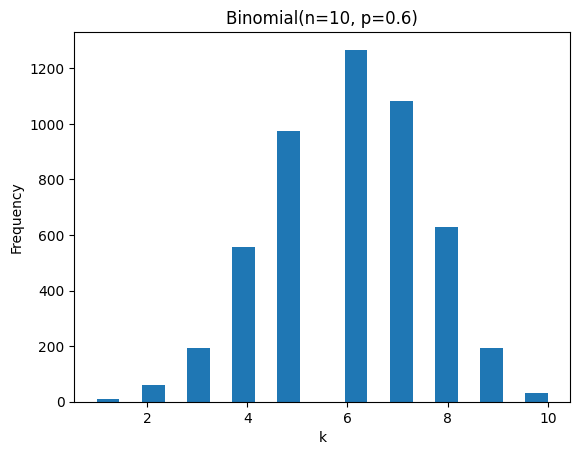

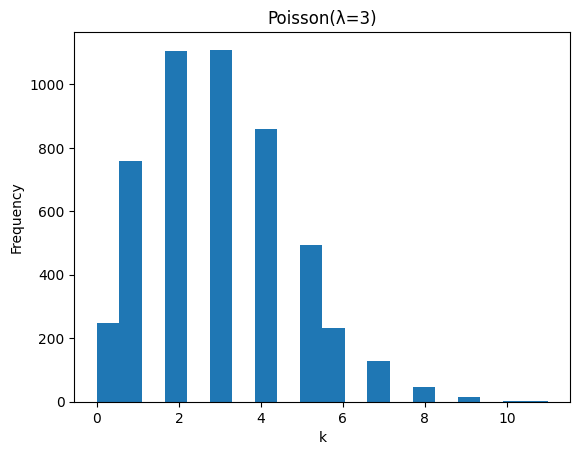

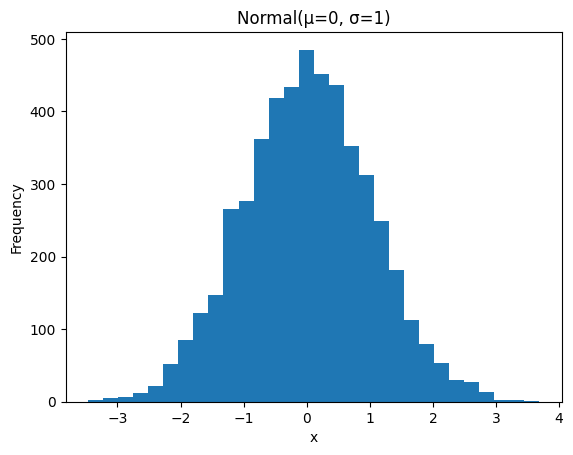

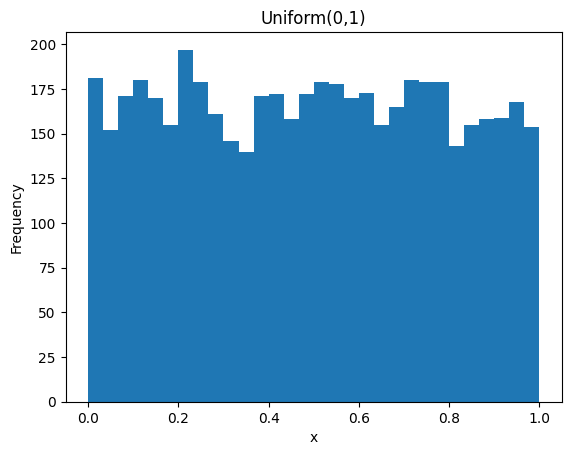

Binomial: mean=6.017, sd=1.550
Poisson: mean=3.011, sd=1.750
Normal: mean=0.016, sd=1.012
Uniform: mean=0.496, sd=0.288


In [6]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# Binomial
binom = rng.binomial(n=10, p=0.6, size=5000)
plt.figure()
plt.hist(binom, bins=20)
plt.title('Binomial(n=10, p=0.6)')
plt.xlabel('k')
plt.ylabel('Frequency')
plt.show()

# Poisson
pois = rng.poisson(lam=3, size=5000)
plt.figure()
plt.hist(pois, bins=20)
plt.title('Poisson(λ=3)')
plt.xlabel('k')
plt.ylabel('Frequency')
plt.show()

# Normal
norm = rng.normal(0, 1, 5000)
plt.figure()
plt.hist(norm, bins=30)
plt.title('Normal(μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

# Uniform
unif = rng.uniform(0, 1, 5000)
plt.figure()
plt.hist(unif, bins=30)
plt.title('Uniform(0,1)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

def stats(name, arr):
    print(f"{name}: mean={arr.mean():.3f}, sd={arr.std(ddof=0):.3f}")

stats("Binomial", binom)
stats("Poisson", pois)
stats("Normal", norm)
stats("Uniform", unif)

## 4) Skewness (Slides 48–49)
**Task:** Generate a positively skewed sample using the lognormal distribution. Compute skewness and visualize with a histogram. Explain what positive skew means in your own words.

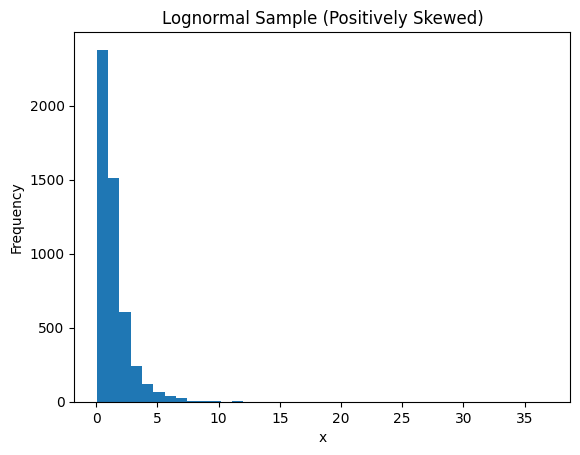

Sample skewness: 6.100954293016358


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

logn = np.random.lognormal(mean=0.0, sigma=0.8, size=5000)
sk = skew(logn)

plt.figure()
plt.hist(logn, bins=40)
plt.title('Lognormal Sample (Positively Skewed)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

print("Sample skewness:", sk)

## 5) Sampling & Central Limit Theorem (Slides 52–58)
**Task A (Sampling):** Implement functions for:
- `simple_random_sample(df, n)`
- `systematic_sample(df, frac)` (take every k‑th row after a random start)
- `stratified_sample(df, by, frac)`
- `cluster_sample(df, by, n_clusters)` (randomly pick clusters, include all rows within)

Use a synthetic DataFrame with columns `store_id`, `region` (A/B/C), and `sales`.

**Task B (CLT):** Draw many samples of size n ∈ {5, 30, 100} from a skewed population and plot the distribution of sample means. Comment on normality emerging as n grows.

In [8]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
N = 600
df = pd.DataFrame({
    "store_id": np.arange(N),
    "region": rng.choice(list("ABC"), size=N, p=[0.4, 0.35, 0.25]),
    "sales": rng.lognormal(mean=3.5, sigma=0.7, size=N)  # skewed
})

def simple_random_sample(df, n):
    return df.sample(n=n, random_state=42)

def systematic_sample(df, frac):
    k = int(1/frac)
    start = rng.integers(0, k)
    idx = np.arange(start, len(df), k)
    return df.iloc[idx]

def stratified_sample(df, by, frac):
    parts = []
    for g, sub in df.groupby(by):
        parts.append(sub.sample(frac=frac, random_state=42))
    return pd.concat(parts).sort_index()

def cluster_sample(df, by, n_clusters):
    clusters = df[by].drop_duplicates().to_list()
    chosen = rng.choice(clusters, size=min(n_clusters, len(clusters)), replace=False)
    return df[df[by].isin(chosen)]

# Demo the functions
srs = simple_random_sample(df, 60)
sys = systematic_sample(df, 0.2)
strat = stratified_sample(df, "region", 0.2)
clust = cluster_sample(df, "region", 1)

len(srs), len(sys), len(strat), len(clust)

(60, 120, 120, 219)

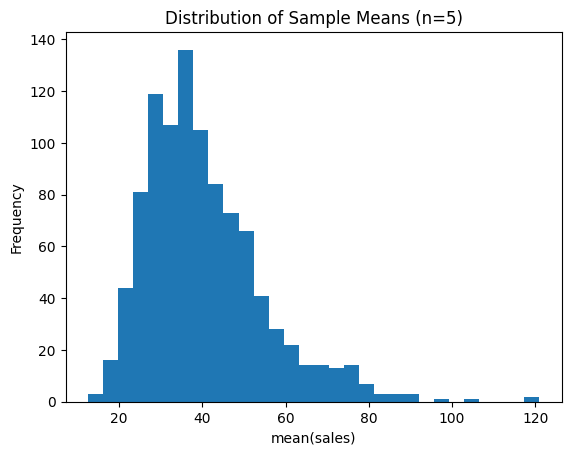

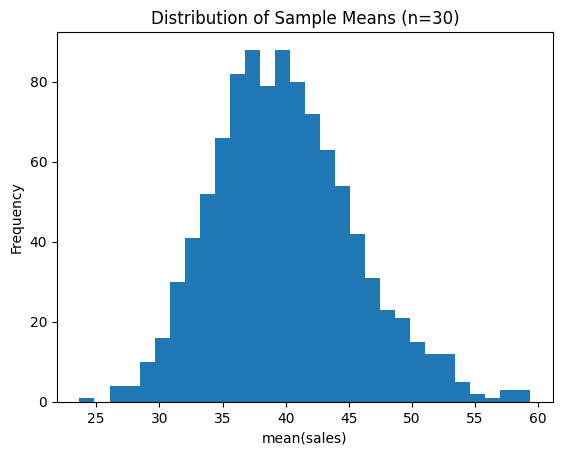

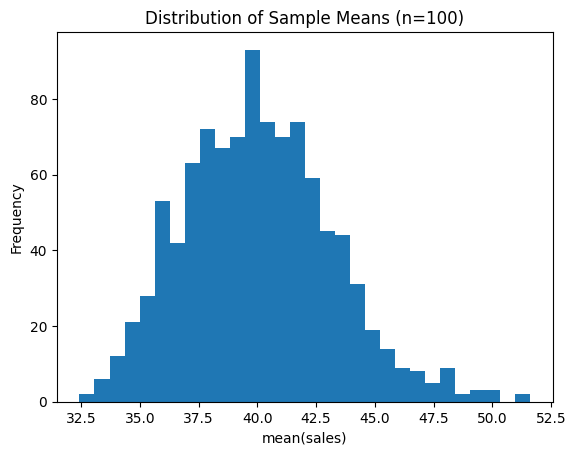

In [9]:
# --- CLT Demo ---
def sample_means(pop, n, reps=1000):
    means = []
    for _ in range(reps):
        means.append(np.mean(np.random.choice(pop, size=n, replace=True)))
    return np.array(means)

pop = df['sales'].values

for n in [5, 30, 100]:
    means = sample_means(pop, n, reps=1000)
    plt.figure()
    plt.hist(means, bins=30)
    plt.title(f'Distribution of Sample Means (n={n})')
    plt.xlabel('mean(sales)')
    plt.ylabel('Frequency')
    plt.show()

## 6) Inferential Statistics (Slides 61–74)
**Data:** Iris dataset.

**Tasks:**
1) **t‑test**: Compare petal length means for Setosa vs. Versicolor.
2) **One‑sample z‑like test** (approx.): Test if Versicolor sepal length mean equals 5.9 (assume population SD≈ sample SD & n>30).
3) **ANOVA**: Compare petal width means across all three species.
4) **Correlation & simple regression**: sepal length vs petal length.

_State the null hypothesis for each test and interpret the p‑value._

T-test petal length (Setosa vs Versicolor): t=-39.493, p=9.93e-46
Approx z-test (Versicolor sepal length = 5.9): z=0.493, p=0.622
ANOVA petal width across species: F=960.007, p=4.17e-85
Pearson r(sepal len, petal len)=0.872, p=1.04e-47


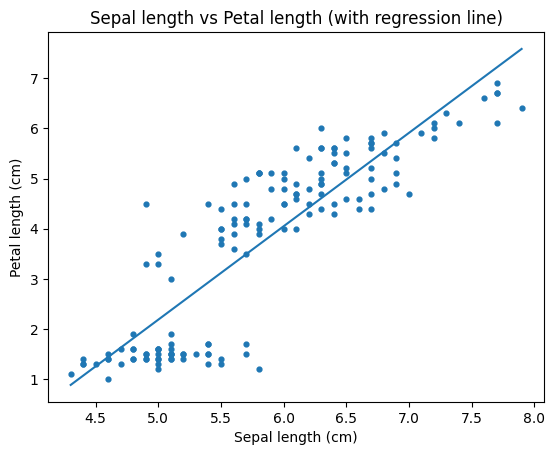

In [10]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load Iris via sklearn
from sklearn.datasets import load_iris
iris_bunch = load_iris(as_frame=True)
iris = iris_bunch.frame
iris['species'] = iris_bunch.target_names[iris_bunch.target]

# 1) t-test: Setosa vs Versicolor (petal length)
setosa = iris[iris['species']=='setosa']['petal length (cm)']
versi = iris[iris['species']=='versicolor']['petal length (cm)']
t_stat, p_val = stats.ttest_ind(setosa, versi, equal_var=False)
print("T-test petal length (Setosa vs Versicolor): t=%.3f, p=%.3g" % (t_stat, p_val))

# 2) One-sample z-like test (approx) on Versicolor sepal length vs 5.9
v_sepal = iris[iris['species']=='versicolor']['sepal length (cm)']
mu0 = 5.9
n = len(v_sepal)
mean = v_sepal.mean()
sd = v_sepal.std(ddof=1)
se = sd/np.sqrt(n)
z = (mean - mu0) / se
p_two = 2*(1 - stats.norm.cdf(abs(z)))
print("Approx z-test (Versicolor sepal length = 5.9): z=%.3f, p=%.3g" % (z, p_two))

# 3) One-way ANOVA: petal width across species
pw_setosa = iris[iris['species']=='setosa']['petal width (cm)']
pw_versi  = iris[iris['species']=='versicolor']['petal width (cm)']
pw_virg   = iris[iris['species']=='virginica']['petal width (cm)']
F, p = stats.f_oneway(pw_setosa, pw_versi, pw_virg)
print("ANOVA petal width across species: F=%.3f, p=%.3g" % (F, p))

# 4) Correlation + simple regression
x = iris['sepal length (cm)'].values
y = iris['petal length (cm)'].values

r, p = stats.pearsonr(x, y)
print("Pearson r(sepal len, petal len)=%.3f, p=%.3g" % (r, p))

# Simple regression via polyfit for visualization
m, b = np.polyfit(x, y, 1)
plt.figure()
plt.scatter(x, y, s=12)
# regression line
xs = np.linspace(x.min(), x.max(), 100)
ys = m*xs + b
plt.plot(xs, ys)
plt.title('Sepal length vs Petal length (with regression line)')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.show()

## 7) Quick Check‑ins (use anytime)
1) If all values in a dataset are identical, what are the variance and SD? Why?
2) In a Poisson(λ=2) process, what is the expected value and variance?
3) When sampling systematically, what risks exist if the data have hidden periodicity?

## 8) What to Hand In
- Your executed notebook (`.ipynb`) with outputs visible.
- Short written answers under each **Reflect** prompt.
- A 3–5 sentence summary: What new concept was clearest? What remains confusing?

# **📌 Exploring Distributions and Skewness**

In this exercise, we will generate random samples from different probability distributions and visualize their shapes. By comparing their histograms and skewness values, you will see how distributions can be symmetric, positively skewed, or negatively skewed.

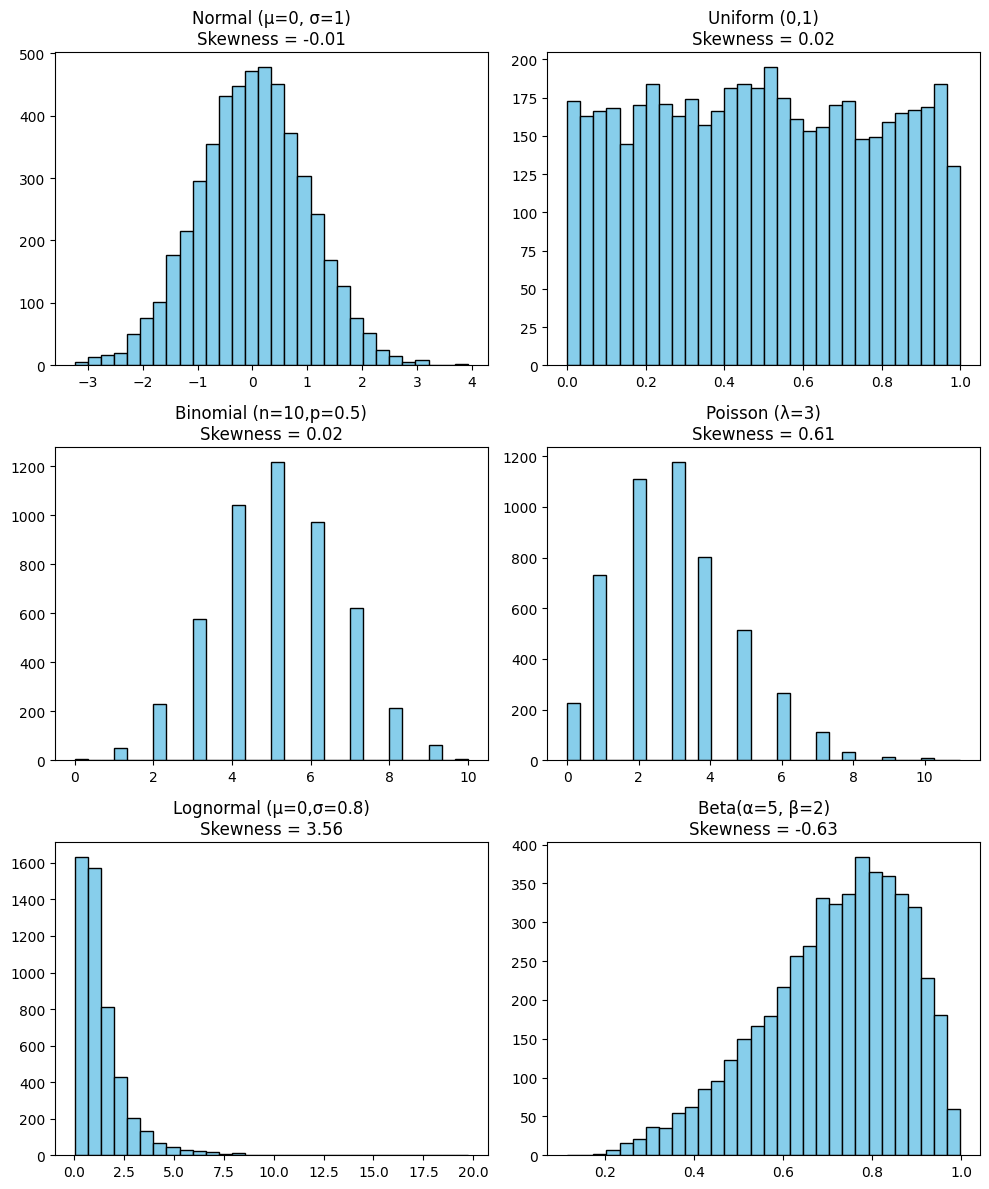

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, beta

np.random.seed(42)

# Generate samples
normal = np.random.normal(0, 1, 5000)         # symmetric
uniform = np.random.uniform(0, 1, 5000)       # flat, symmetric
binomial = np.random.binomial(10, 0.5, 5000)  # approx symmetric
poisson = np.random.poisson(3, 5000)          # slight positive skew
lognormal = np.random.lognormal(0, 0.8, 5000) # strongly positive skew
beta_left = beta.rvs(5, 2, size=5000)         # negatively skewed

# Compute skewness
distributions = {
    "Normal (μ=0, σ=1)": normal,
    "Uniform (0,1)": uniform,
    "Binomial (n=10,p=0.5)": binomial,
    "Poisson (λ=3)": poisson,
    "Lognormal (μ=0,σ=0.8)": lognormal,
    "Beta(α=5, β=2)": beta_left
}

# Plot
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

for ax, (name, data) in zip(axs.ravel(), distributions.items()):
    ax.hist(data, bins=30, color="skyblue", edgecolor="black")
    ax.set_title(f"{name}\nSkewness = {skew(data):.2f}")

plt.tight_layout()
plt.show()


# **Comparing Groups and Relationships in Data**

In this section, we will simulate data and apply three widely used statistical techniques in data science. These methods help us decide if group differences are meaningful or if two variables move together.

🔹 Step 1: Independent T-Test

Compares the average values of two groups.

Example: Are exam scores of Group A and Group B different?

Function used: stats.ttest_ind()

🔹 Step 2: ANOVA (Analysis of Variance)

Compares the average values of three or more groups at once.

Example: Do students taught by Traditional, Online, and Blended methods have different average scores?

Function used: stats.f_oneway()

🔹 Step 3: Correlation

Measures the strength and direction of a relationship between two variables.

Example: Do study hours relate to exam scores?

Function used: stats.pearsonr()

In [10]:
import numpy as np
from scipy import stats

# 1. Independent T-Test
groupA = np.random.normal(70, 5, 30)
groupB = np.random.normal(75, 5, 30)
t_stat, p_val = stats.ttest_ind(groupA, groupB)
print("T-Test result:", t_stat, p_val)

# 2. ANOVA
traditional = np.random.normal(72, 5, 30)
online = np.random.normal(68, 5, 30)
blended = np.random.normal(78, 5, 30)
f_stat, p_val = stats.f_oneway(traditional, online, blended)
print("ANOVA result:", f_stat, p_val)

# 3. Correlation
study_hours = np.random.randint(1, 10, 30)
exam_scores = study_hours * 8 + np.random.normal(0, 5, 30)  # positive correlation
corr, p_val = stats.pearsonr(study_hours, exam_scores)
print("Correlation result:", corr, p_val)


T-Test result: -4.10442485692879 0.00012838146127259694
ANOVA result: 29.230553768203702 1.9480395772767517e-10
Correlation result: 0.9765139473684196 3.296419536567957e-20
